In [1]:
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
from uncertainties import ufloat
import scienceplots

plt.style.use('science')

In [2]:
first = pd.read_csv('data/1_2mv.csv')
second = pd.read_csv('data/20hz.csv')

In [3]:
def model1(ni, a, b):
    return a/(1+(b*2*np.pi*ni)**2)


def model2(ni, a, b):
    return -a*b*ni/(1+(b*2*np.pi*ni)**2)

[0.43765305 0.00260042]
[1.62431362e-03 2.49438027e-05]
[3.10133736e+00 2.75224435e-03]
[0.3069297  0.00050679]


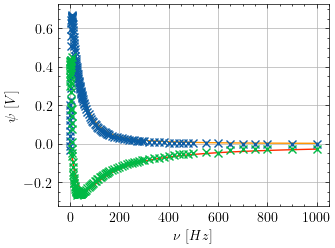

In [4]:
plt.errorbar(first['ni'], first['X'], 0.01, fmt='x')
plt.errorbar(first['ni'], first['Y'], 0.01, fmt='x')

popt, pcov = curve_fit(model1, first['ni'], first['X'], p0=(50, 0.003), sigma=0.01, absolute_sigma=True)
print(popt)
print(np.sqrt(np.diag(pcov)))
nis = np.linspace(0, 1000, 100)
plt.plot(nis, model1(nis, *popt))

popt, pcov = curve_fit(model2, first['ni'], first['Y'], p0=(50, 0.003))
print(popt)
print(np.sqrt(np.diag(pcov)))
nis = np.linspace(0, 1000, 100)
plt.plot(nis, model2(nis, *popt))

plt.grid()
plt.xlabel('$\\nu\\ [Hz]$')
plt.ylabel('$\\psi\\ [V]$')
plt.savefig('porocilo/vijuga.pdf', dpi=512)


[ 9.66369898 -0.16109996]
[0.03789129 0.05706189]
[-20.84321455   2.21180472]
[0.45841169 0.69033893]


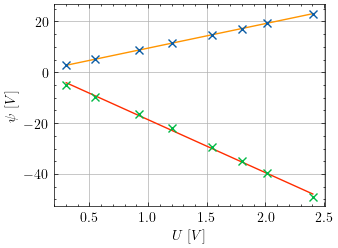

In [5]:
plt.errorbar(second['Voltage'], second['X'], 0.01, fmt='x')
plt.errorbar(second['Voltage'], second['Y'], 0.01, fmt='x')

def model4(x, a, b):
    return a*x + b

popt, pcov = curve_fit(model4, second['Voltage'], second['X'])
print(popt)
print(np.sqrt(np.diag(pcov)))
plt.plot(second['Voltage'], model4(second['Voltage'], *popt))

popt, pcov = curve_fit(model4, second['Voltage'], second['Y'])
print(popt)
print(np.sqrt(np.diag(pcov)))
plt.plot(second['Voltage'], model4(second['Voltage'], *popt))

plt.grid()
plt.xlabel('$U\\ [V]$')
plt.ylabel('$\\psi\\ [V]$')
plt.savefig('porocilo/straight.pdf', dpi=512)


[-0.00293699 -0.14461364]
[0.00012002 0.02795012]


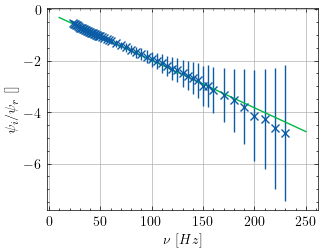

In [6]:
def model3(ni, a, b):
    return 2*np.pi*a*ni + b

first['r error'] = np.abs(0.01/first['X']) + np.abs(0.01*first['Y']/first['X']**2)

popt, pcov = curve_fit(model3, first['ni'][40:100], first['Y'][40:100]/first['X'][40:100], sigma=first['r error'][40:100], absolute_sigma=True)
print(popt)
print(np.sqrt(np.diag(pcov)))

plt.errorbar(first['ni'][40:100], (first['Y'][40:100]/first['X'][40:100]), first['r error'][40:100], fmt='x')

nis = np.linspace(10, 250, 100)
plt.plot(nis, model3(nis, *popt))

plt.grid()
plt.xlabel('$\\nu\\ [Hz]$')
plt.ylabel('$\\psi_i/\\psi_r\\ []$')
plt.savefig('porocilo/errs.pdf', dpi=512)